<a href="https://colab.research.google.com/github/theokunj/practice/blob/main/ME592_hw1_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import pandas as pd

In [2]:
filepath = "/content/drive/MyDrive/Colab Notebooks/ME5920/energydata_complete.csv"

data = pd.read_csv(filepath)

start :  2016-01-12 00:00:00
end:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


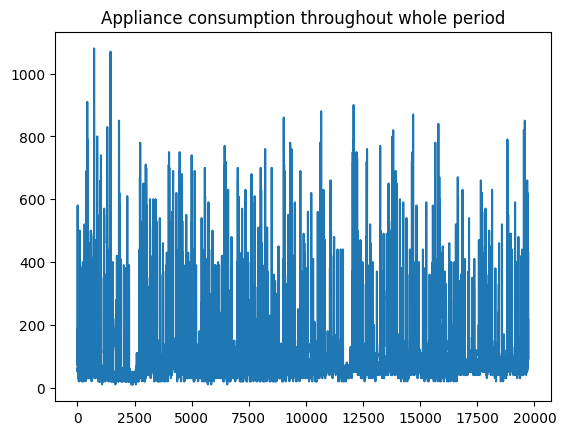

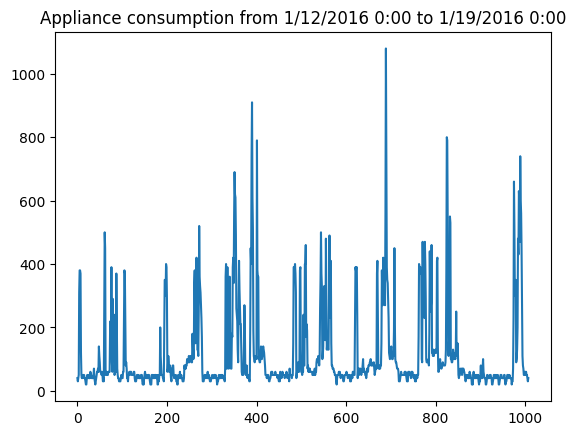

In [3]:
#create array of tuples of the values
appl_consume = data.Appliances.values

# Plot the entire appliance consumption
plt.figure()
plt.plot(appl_consume[:])
plt.title("Appliance consumption throughout whole period")
#plt.show()

# Prepare for the second plot
plt.figure()

if not pd.api.types.is_datetime64_any_dtype(data['date']):
    data['date'] = pd.to_datetime(data['date'])



def date2idx(start_date, end_date):

  start_datetime = pd.to_datetime(start_date, format='%m/%d/%Y %H:%M')
  end_datetime = pd.to_datetime(end_date,  format='%m/%d/%Y %H:%M')
  print("start : ", start_datetime)
  print("end: ",type(end_datetime))
  # Find the numerical index corresponding to the dates

  start_index = (data['date'] == start_datetime).idxmax()
  end_index = (data['date'] ==end_datetime).idxmax()
  #print("start index:", start_index)
  #print("end index:", end_index)

  return (start_index, end_index)
start_date = "1/12/2016 0:00"
end_date = "1/19/2016 0:00"
start, end = date2idx(start_date, end_date)
#plot from start to end datetime indices
plt.plot(appl_consume[start :end])
plt.title(f"Appliance consumption from {start_date} to {end_date}")
plt.show()

start :  2016-01-12 00:00:00
end:  <class 'pandas._libs.tslibs.timestamps.Timestamp'>
42 1050
(1008,)


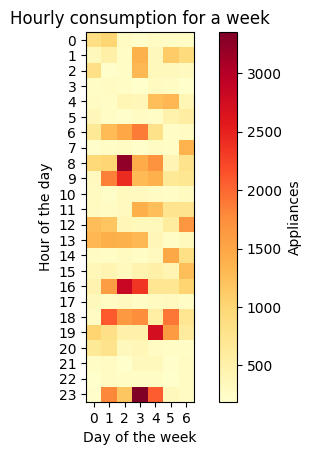

In [4]:
# hourly consumption for a week

#print(appl_consume.shape)
#print(19735/(6*24))

start_day, end_day  = date2idx("1/12/2016 0:00", "1/19/2016 0:00")
print(start_day, end_day)
week = np.array(appl_consume[start_day:end_day])
print(week.shape)
#hourly = week.sum
#caclulate hourly consumption by summing 6 readings into one
hourly_consum = week.reshape(7,24,6)
hour = hourly_consum.sum(axis=2)

plt.imshow(hour.reshape(24, 7), cmap= 'YlOrRd')
plt.title("Hourly consumption for a week")
plt.xlabel("Day of the week")
plt.ylabel("Hour of the day")
plt.colorbar(label="Appliances")
plt.yticks(np.arange(24)) # Ensure all 24 hours are shown
plt.xticks(np.arange(7))
plt.show()

Text(0, 0.5, '# of readings')

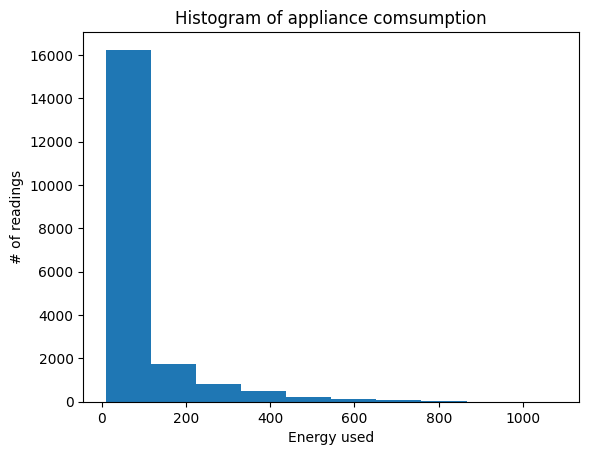

In [5]:
#histogram
plt.figure
plt.hist(appl_consume)
plt.title("Histogram of appliance comsumption")
plt.xlabel("Energy used")
plt.ylabel("# of readings")

In [6]:
#4. NSM vs energy plot

# first 42 entries for the 5PM start datetime
nsm_arr1 = np.zeros(42)
print(nsm_arr1.shape)

for i in range(len(nsm_arr1)):
  nsm_arr1[i] = (i %42)*600

#144 readings per day- reset to zero every midnight

#42-end
nsm_arr2 = np.zeros_like(appl_consume[42:], dtype=int)
print(nsm_arr2.shape)

for i in range(len(nsm_arr2)):
  nsm_arr2[i] = (i % 144) * 600

nsm_arr = np.concatenate((nsm_arr1, nsm_arr2))
print(nsm_arr[0:187])
#print(nsm_arr1.shape +nsm_arr2.shape == appl_consume.shape)

(42,)
(19693,)
[    0.   600.  1200.  1800.  2400.  3000.  3600.  4200.  4800.  5400.
  6000.  6600.  7200.  7800.  8400.  9000.  9600. 10200. 10800. 11400.
 12000. 12600. 13200. 13800. 14400. 15000. 15600. 16200. 16800. 17400.
 18000. 18600. 19200. 19800. 20400. 21000. 21600. 22200. 22800. 23400.
 24000. 24600.     0.   600.  1200.  1800.  2400.  3000.  3600.  4200.
  4800.  5400.  6000.  6600.  7200.  7800.  8400.  9000.  9600. 10200.
 10800. 11400. 12000. 12600. 13200. 13800. 14400. 15000. 15600. 16200.
 16800. 17400. 18000. 18600. 19200. 19800. 20400. 21000. 21600. 22200.
 22800. 23400. 24000. 24600. 25200. 25800. 26400. 27000. 27600. 28200.
 28800. 29400. 30000. 30600. 31200. 31800. 32400. 33000. 33600. 34200.
 34800. 35400. 36000. 36600. 37200. 37800. 38400. 39000. 39600. 40200.
 40800. 41400. 42000. 42600. 43200. 43800. 44400. 45000. 45600. 46200.
 46800. 47400. 48000. 48600. 49200. 49800. 50400. 51000. 51600. 52200.
 52800. 53400. 54000. 54600. 55200. 55800. 56400. 57000. 57600

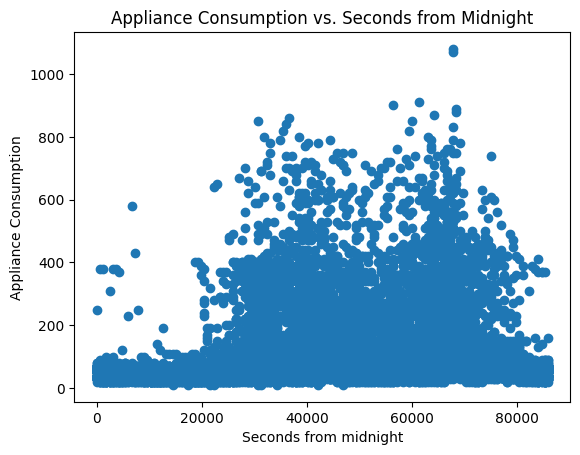

In [20]:
plt.figure()
plt.scatter(nsm_arr, appl_consume)
#plt.xticks(np.arange(0, 86400, 3600), labels=[f'{h}' for h in range(24)])
plt.xlabel("Seconds from midnight")
plt.ylabel("Appliance Consumption")
plt.title("Appliance Consumption vs. Seconds from Midnight")
plt.show()

(19735,)


Text(0, 0.5, 'Energy consumption of appliances')

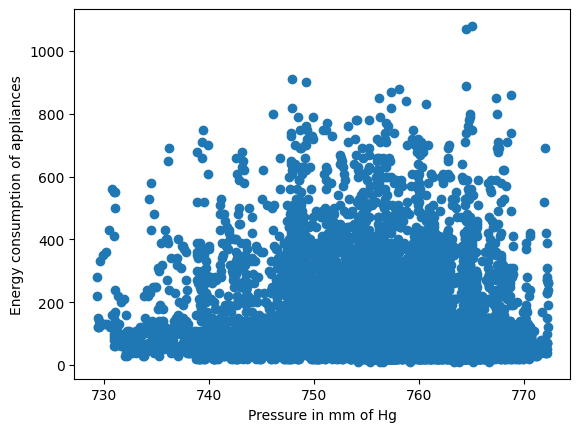

In [10]:
# Appliance energy vs Press_mm_Hg
press = data.Press_mm_hg.values
print(press.shape)

plt.figure
plt.scatter(press, appl_consume)
plt.xlabel('Pressure in mm of Hg')
plt.ylabel('Energy consumption of appliances')
#plt.plot(appl_consume, press)

(array([ 441., 1731., 3600., 4823., 4364., 2349., 1370.,  568.,  357.,
         132.]),
 array([-5.  , -1.89,  1.22,  4.33,  7.44, 10.55, 13.66, 16.77, 19.88,
        22.99, 26.1 ]),
 <BarContainer object of 10 artists>)

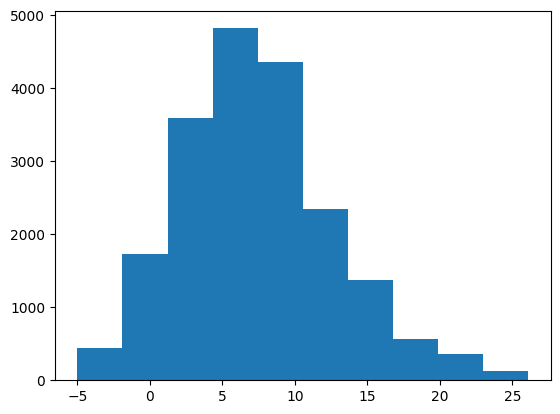

In [14]:
#plot temp vs energy
temp_out = data.T_out.values
day_temp = temp_out
plt.figure
plt.hist(temp_out)

#**COMMENT ON ENERGY CONSUMPTION VS PRESS AND NSM**